<a href="https://colab.research.google.com/github/abkerper/project_gss/blob/main/Taylor_cleaned_relig_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [ ]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [ ]:
df = pd.read_csv("./selected_gss_data.csv", low_memory = False)
import pandas as pd
df1 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet', engine='pyarrow')
df2 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet', engine='pyarrow')
df3 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet', engine='pyarrow')
df = pd.concat([df1, df2, df3])

protestant                       40125
catholic                         17242
none                              9895
jewish                            1421
other                             1224
christian                         1000
buddhism                           272
muslim/islam                       201
orthodox-christian                 176
inter-nondenominational            159
hinduism                           158
other eastern religions             44
native american                     36
not imputable_(2147483638)           0
not available in this year           0
not available in this release        0
uncodeable                           0
skipped on web                       0
refused                              0
don't know                           0
not imputable_(2147483637)           0
no answer                            0
dk, na, iap                          0
I don't have a job                   0
iap                                  0
see codebook             

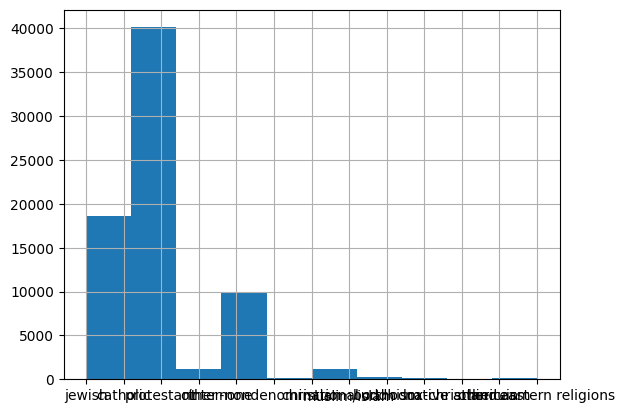

In [ ]:
df4 = df.loc[:,['relig', 'polviews', 'age', 'cappun'] ]
print(df4['relig'].value_counts())
print(df4['relig'].hist(), '/n')

In [ ]:
import numpy as np
relig = df4['relig']
relig = relig.replace(['not imputable_(2147483638)' ,
                       'not available in this year' ,
                       'not available in this release' ,
                       'uncodeable' ,
                       'skipped on web' ,
                       'refused' ,
                       "don't know" ,
                       'not imputable_(2147483637)' ,
                       'no answer' ,
                       'dk, na, iap' ,
                       "I don't have a job" ,
                       'iap' ,
                       'see codebook'], np.nan)
relig.value_counts()

protestant                 40125
catholic                   17242
none                        9895
jewish                      1421
other                       1224
christian                   1000
buddhism                     272
muslim/islam                 201
orthodox-christian           176
inter-nondenominational      159
hinduism                     158
other eastern religions       44
native american               36
Name: relig, dtype: int64

In [ ]:
relig = relig.replace(['christian', 'inter-nondenominational', 'orthodox-christian'], 'christianity')
relig = relig.replace(['none', 'other', 'other eastern religions'], 'none/other')
relig.value_counts()

protestant         40125
catholic           17242
none/other         11163
jewish              1421
christianity        1335
buddhism             272
muslim/islam         201
hinduism             158
native american       36
Name: relig, dtype: int64

<Axes: >

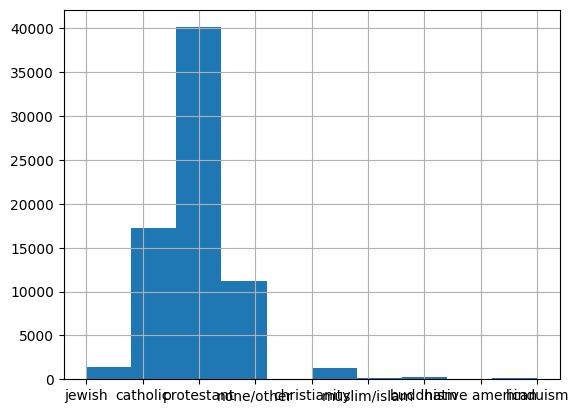

In [ ]:
relig.hist()